In [42]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pickle as pkl

In [2]:
train_set = pd.read_csv('../../data/train_scaled_encoded.csv')
test_set = pd.read_csv('../../data/test_scaled_encoded.csv')

In [5]:
action_map = {}
count = 0
for iv in range(5):
    for vaso in range(5):
        action_map[(iv, vaso)] = count
        count += 1

In [6]:
def get_phy_actions(df):
    phy_actions = []
    vasos = df['vaso_input'].values
    ivs = df['iv_input'].values
    for i, iv in enumerate(ivs):
        phy_actions += [ action_map[ (iv, vasos[i]) ] ]
    return phy_actions

### physician actions

In [7]:
train_phy_actions = get_phy_actions(train_set)
test_phy_actions = get_phy_actions(test_set)

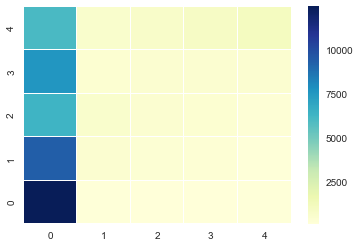

In [70]:
action_counts = pd.Series(test_phy_actions).value_counts().sort_index().values
ax = sns.heatmap(action_counts.reshape(5,5), linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()

### Kernel actions

In [43]:
kernel_based = pkl.load(open('test_kernel_policy_transformed.pkl', 'rb'), encoding='latin1')
expert_k = kernel_based[:,3]

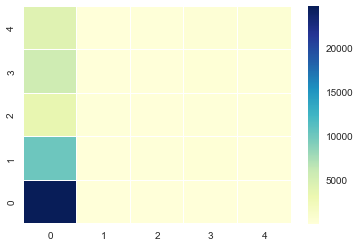

In [64]:
action_counts = pd.Series(expert_k).value_counts().sort_index().values
ax = sns.heatmap(action_counts.reshape(5,5), linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()

### DQN actions

In [45]:
expert_d = pkl.load(open('../../../code/results/with_end_state/test_agent_actions.pkl', 'rb'), encoding='latin1')

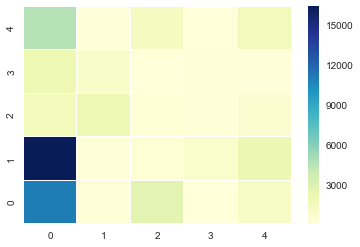

In [63]:
action_counts = pd.Series(expert_d).value_counts().sort_index().values
ax = sns.heatmap(action_counts.reshape(5,5), linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()

## MOE actions

In [68]:
moe = pkl.load(open('moe_actions.pkl', 'rb'))

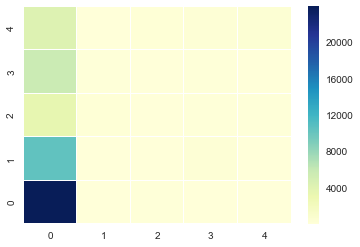

In [69]:
action_counts = pd.Series(moe).value_counts().sort_index().values
ax = sns.heatmap(action_counts.reshape(5,5), linewidths=.01, cmap="YlGnBu")
ax.invert_yaxis()

## Sparse autoencoder

In [66]:
losses = [0.0982328,0.0733788,0.0571428,0.050553,0.0441328,0.0260805,0.0235437,0.0196456,0.0180331,0.0156168,0.0125812,0.0113878,0.00986484,0.00885993,0.00770599,0.00676957,0.00612195,0.00518439,0.00487075,0.00416981,0.0036631,0.00327092,0.00343543,0.00270168,0.0024088,0.00226782,0.00200392,0.00189824,0.00168429,0.00187243,0.0017625,0.00154069,0.00135107,0.0012432,0.0011839,0.00129685,0.00136126,0.0011969,0.00114256,0.00106463,0.0009524,0.00104332,0.0011232,0.000881697,0.000888103,0.000939946,0.000838807,0.000850197,0.000747317,0.000744563,0.000805789,0.000728338,0.000806852,0.000704113,0.000621048,0.000706232,0.00059969,0.000720266,0.000639709,0.00062372,0.000582317,0.000591075,0.000667023,0.000581891,0.000609561,0.000541731,0.00052279,0.000566309,0.000565176,0.000566283,0.000481784,0.000539299,0.000538973,0.000514208,0.000511358,0.000493816,0.000477208,0.000538729,0.000548364,0.000470602,0.000405979,0.000468141,0.00046181,0.000453733,0.000477661,0.000453062,0.000451573,0.000419774,0.000491614,0.000395685,0.000403904,0.000451452,0.000380449,0.000404947,0.000381785,0.000418023,0.000402506,0.000427586,0.000392169]
steps = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,21000,22000,23000,24000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,53000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,76000,77000,78000,79000,80000,81000,82000,83000,84000,85000,86000,87000,88000,89000,90000,91000,92000,93000,94000,95000,96000,97000,98000,99000]

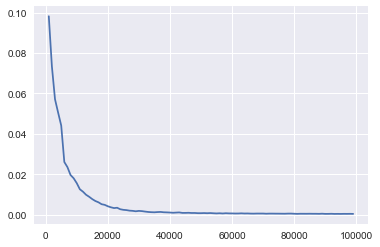

In [67]:
sns.set_style("darkgrid")
plt.plot(steps, losses)
plt.show()